<font>  This Heart Disease Dataset dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease. <h2>  [Dataset link](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) </h2>

In [1]:
data_path= 'heart.csv'

In [3]:
import pandas as pd
df= pd.read_csv(data_path)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


<font color= "lime"> <h2> <b> Data Processing

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [10]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 40)

Column: age
[52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
----------------------------------------
Column: sex
[1 0]
----------------------------------------
Column: cp
[0 1 2 3]
----------------------------------------
Column: trestbps
[125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
----------------------------------------
Column: chol
[212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247

In [12]:
from sklearn.model_selection import train_test_split

y = df["target"]
X = df.drop('target', axis=1)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, random_state=0)

In [13]:
print("train data shape: ", X_train.shape, y_train.shape)
print("validation data shape: ", X_val.shape, y_val.shape)
print("test data shape: ", X_test.shape, y_test.shape)

train data shape:  (574, 13) (574,)
validation data shape:  (246, 13) (246,)
test data shape:  (205, 13) (205,)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled= scaler.transform(X_val)

<font color= "lime"> <h2> <b> Neural Network

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

ModuleNotFoundError: No module named 'torch'

In [ ]:
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # For binary classification, convert (N,) to (N, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
X_val_tensor = torch.tensor(X_val_scaled, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).unsqueeze(1)

In [22]:
class CustomNN(nn.Module):
    def __init__(self, input_dim):
        super(CustomNN, self).__init__()      # calls the constructor of the parent class

        # Define the layers
        self.fc1 = nn.Linear(input_dim, 64)  # First hidden layer
        self.fc2 = nn.Linear(64, 128)        # Second hidden layer
        self.fc3 = nn.Linear(128, 64)        # Third hidden layer
        self.fc4 = nn.Linear(64, 1)          # Output layer (binary classification)

        # Define activation and dropout
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)       # Dropout to prevent overfitting     #  neurons are temporarily set to zero (ignoring those neurons)
        self.sigmoid = nn.Sigmoid()          # For binary classification

    def forward(self, x):

        x = self.relu(self.fc1(x))
        x = self.dropout(x)

        x = self.relu(self.fc2(x))
        x = self.dropout(x)

        x = self.relu(self.fc3(x))
        x = self.dropout(x)

        x = self.sigmoid(self.fc4(x))
        return x


NameError: name 'nn' is not defined

<font color= "lime"> <h2> <b> Loss function and Optimizer

In [ ]:
input_dim = X_train_tensor.shape[1]  # .shape will return (samples,features)
model = CustomNN(input_dim)


loss_fn = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

<font color= "lime"> <h2> <b> Dataloader

In [ ]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)       # tensordataset is a PyTorch utility that allows you to wrap tensors into a dataset
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)          # useful when using a DataLoader
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
                                                                    # You can create your own dataset by using torch.utils.data.Dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader= DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

<font color= "lime"> <h2> <b> Training

In [ ]:
num_epochs = 150  # Updated to account for potential overfitting scenarios
best_val_loss = float('inf')  # To track the best validation loss
train_losses = []  # Store training losses
val_losses = []  # Store validation losses
train_accuracies = []  # Store training accuracies
val_accuracies = []  # Store validation accuracies

# Loop over the epochs (one complete pass through the entire training dataset)   # example: 1,000 samples & batch size 100 ; no of  steps (batches) = 1000/100 and 1 epoch = 10 steps
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0

    # Training loop
    for data in train_loader:                 # train_loader is a DataLoader object (go through batches in the train_loader)
        inputs, labels = data                 # unpacks input and it's label
        optimizer.zero_grad()                 # clears the old gradients
        outputs = model(inputs)               # see model architecture
        loss = loss_fn(outputs, labels)       # calculate loss
        loss.backward()                       # calculates the gradients
        optimizer.step()                      # updates the model's weights based on the computed gradients

        running_loss += loss.item()           # total loss for all batches

        # Calculate training accuracy
        predicted_train = (outputs >= 0.5).float()                    # if output >= 0.5 then 1 else 0
        correct_train += (predicted_train == labels).sum().item()     # counts the number of correct predictions across all batches
        total_train += labels.size(0)                                 # total number of samples processed so far

    train_loss = running_loss / len(train_loader)       # average training loss for the epoch  (total loss/ no of batches)
    train_accuracy = correct_train / total_train        # training accuracy for the epoch (total correct / total sample)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()  # Set the model to evaluation mode
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():                       # Disabling gradient calculation (gradients are not tracked & reduce memory consumption)
        for data in val_loader:                 # provides batches of validation data
            inputs, labels = data
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            running_val_loss += loss.item()

            # Calculate validation accuracy
            predicted_val = (outputs >= 0.5).float()
            correct_val += (predicted_val == labels).sum().item()
            total_val += labels.size(0)

    val_loss = running_val_loss / len(val_loader)
    val_accuracy = correct_val / total_val
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # Print epoch stats
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, "
          f"Train Accuracy: {train_accuracy * 100:.2f}%, Val Accuracy: {val_accuracy * 100:.2f}%")

    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(model.state_dict(), 'best_model.pth')  # Save best weights

# After training, load the best model
model.load_state_dict(torch.load('best_model.pth'))
print("Best model loaded from epoch with lowest validation loss.")


Epoch [1/150], Train Loss: 0.6914, Val Loss: 0.6901, Train Accuracy: 50.70%, Val Accuracy: 59.76%
Epoch [2/150], Train Loss: 0.6866, Val Loss: 0.6821, Train Accuracy: 56.62%, Val Accuracy: 65.04%
Epoch [3/150], Train Loss: 0.6787, Val Loss: 0.6681, Train Accuracy: 60.63%, Val Accuracy: 73.98%
Epoch [4/150], Train Loss: 0.6608, Val Loss: 0.6420, Train Accuracy: 70.03%, Val Accuracy: 78.46%
Epoch [5/150], Train Loss: 0.6349, Val Loss: 0.5969, Train Accuracy: 73.34%, Val Accuracy: 80.49%
Epoch [6/150], Train Loss: 0.5716, Val Loss: 0.5165, Train Accuracy: 77.70%, Val Accuracy: 84.55%
Epoch [7/150], Train Loss: 0.5028, Val Loss: 0.4258, Train Accuracy: 82.75%, Val Accuracy: 83.74%
Epoch [8/150], Train Loss: 0.4460, Val Loss: 0.3716, Train Accuracy: 82.58%, Val Accuracy: 85.77%
Epoch [9/150], Train Loss: 0.4252, Val Loss: 0.3525, Train Accuracy: 81.88%, Val Accuracy: 86.18%
Epoch [10/150], Train Loss: 0.3872, Val Loss: 0.3481, Train Accuracy: 82.40%, Val Accuracy: 85.77%
Epoch [11/150], Tra

<ipython-input-18-ddbf107e5e2f>:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


<font color= "lime"> <h2> <b> Plot train vs val loss

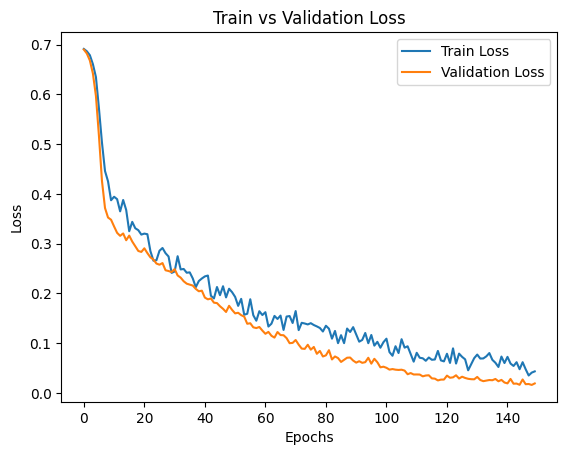

In [ ]:
import matplotlib.pyplot as plt


plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<font color= "lime"> <h2> <b> Testing

<ipython-input-20-5f22e6914cfe>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Test Loss: 0.0271, Test Accuracy: 99.02%


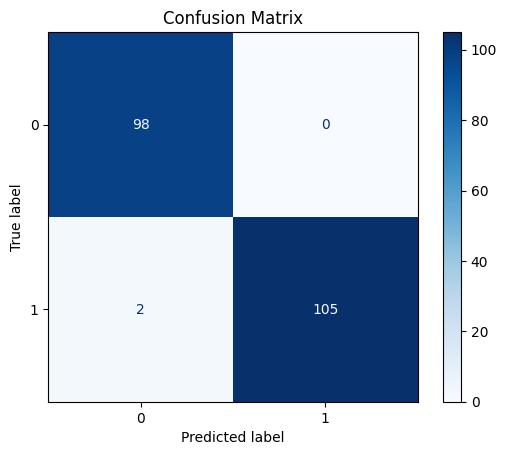

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


model.load_state_dict(torch.load('best_model.pth'))
model.eval()  # Set the model to evaluation mode

test_loss = 0.0
correct_test = 0
total_test = 0

# Lists to store true labels and predictions for the confusion matrix
all_labels = []
all_predictions = []

# Testing loop
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        test_loss += loss.item()

        # Calculate test accuracy
        predicted_test = (outputs >= 0.5).float()

        # Store true labels and predicted labels
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted_test.numpy())

        correct_test += (predicted_test == labels).sum().item()
        total_test += labels.size(0)

# Calculate average test loss and accuracy
average_test_loss = test_loss / len(test_loader)
test_accuracy = correct_test / total_test

# Print test results
print(f"Test Loss: {average_test_loss:.4f}, Test Accuracy: {test_accuracy * 100:.2f}%")

# Calculate and display confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)

# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()